

Notes for me:
- Remove always show toolbar before starting
- Set zoom to 150%
- check there is internet


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

## Machine Learning with Python and Scikit Learn

Follow presentation on: http://bit.ly/ML-SpringCampus


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

## What is Machine Learning?

The process of teaching computers to learn from data.

### Learning tasks:

- Clustering

- Regression

- Outlier Detection

- Classification

- Time series prediction


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

# Supervised vs Unsupervised Learning


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

## Classification vs Regression

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

## Let's look at some code:

We will use:
 - [Pandas: Python Data Analysis Library](http://pandas.pydata.org/)
 - [Scikit-Learn](http://scikit-learn.org/stable/)
 - [Numpy](http://www.numpy.org/)
 - [Matplotlib](matplotlib.org)
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
__Importing stuff...__

In [1]:
import warnings

import numpy as np
import pandas as pd

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import Utils
from Utils import cmap_light
from Utils import cmap_bold 

Import done


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# Boston House Prices 

In [2]:
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

X = boston_dataset.data
Y = boston_dataset.target

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
names = list(boston_dataset.feature_names) + ['Price']

labels = np.reshape(Y,
                     (Y.shape[0], 1))
df = pd.DataFrame(data=np.concatenate((X, labels), axis=1),
                 columns=names)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9



<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
## The data


__Dataset:__ 

a set of __examples__ each characterized by __features__ and  usually there is a __label variable__ that you want to predict. 

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
## Let's see a real example:

In [4]:
df_tmp = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
             'RM', 'Price']]
df_tmp.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,18.9


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

In [5]:
df_tmp.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,50.000000


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

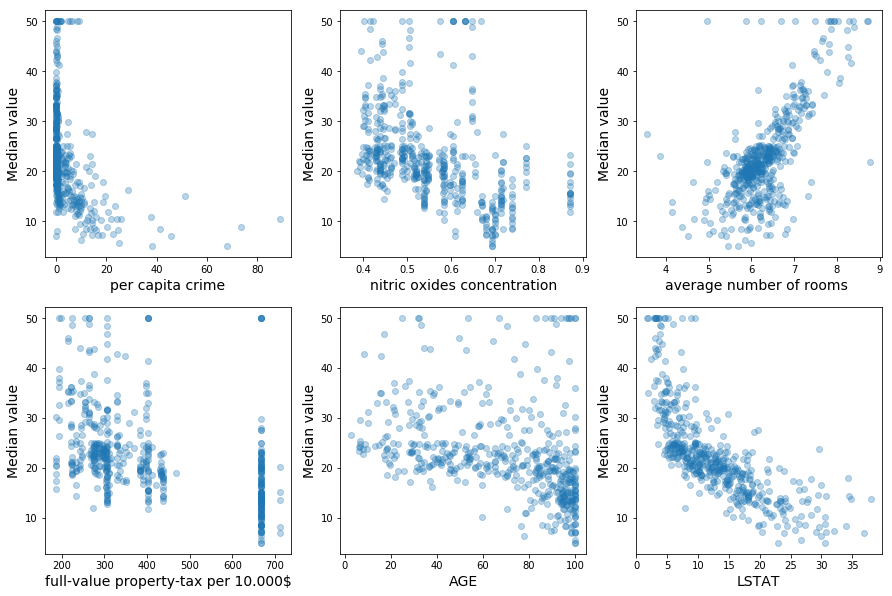

In [6]:
from Utils import plot_boston_dataset
plot_boston_dataset(boston_dataset.data, 
                    boston_dataset.target)

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
## First model:  Linear Regression 


    
<img src="https://imgs.xkcd.com/comics/linear_regression.png" title="XKCD: Linear Regression" width="512" height="342" />

_The 95% confidence interval suggests Rexthor's dog could also be a cat, or possibly a teapot._

In [7]:
model = LinearRegression()

model.fit(X, Y)

r2 = model.score(X, Y)

print("R^2 value: {:0.3f}".format(r2))


R^2 value: 0.741


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

In [8]:
example_n = np.random.randint(0, Y.shape[0])

Utils.describe_example_boston_dataset(X[example_n])

print("\n\nPredicted price: {:2.2f} Real value: {:2.2f}".format(
        model.predict(X[example_n].reshape(1, -1))[0], Y[example_n]))

Feature: CRIM     -    18.08
Feature: ZN       -     0.00
Feature: INDUS    -    18.10
Feature: CHAS     -     0.00
Feature: NOX      -     0.68
Feature: RM       -     6.43
Feature: AGE      -   100.00
Feature: DIS      -     1.83
Feature: RAD      -    24.00
Feature: TAX      -   666.00
Feature: PTRATIO  -    20.20
Feature: B        -    27.25
Feature: LSTAT    -    29.05


Predicted price: 9.55 Real value: 7.20


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
## Distinguishing Species of Iris plants:

<br><br>
<img src="https://c1.staticflickr.com/1/402/31713322286_8c85f8b6b6_z.jpg" title="Iris flower" width="512" height="342" />

[Source: Big Cypress National Preserve](https://www.flickr.com/photos/bigcypressnps/31713322286/in/photolist-Qjp4QJ-ha3kMy-4KVwB4-4Minkn-fb7Jye-sb5tXz-dsWnJ9-4LhUuW-6oioBi-4LhUdA-GFsivk-szxsRT-dkse9b-4KVwk4-GPNUCc-dksd7u-ha6uis-dtXQmu-2enBH-qsaLo7-qsaUYy-rp5XxE-rp9N4p-r7JFac-r5SjCe-dksdro-dkscBm-HKf4AB-LcBBEv-dksbkv-dksb2i-dksa8H-dksbDi-rRTCUf-wRiRYq-dksd3N-dkscSd-dkscP5-dksag6-a2hYQC-e26B2-r7AuaS-rp6h47-2enc6-r7CpdL-r7H5uH-r7C435-rmT8D1-r7BefQ-J4WHV)

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

In [9]:
iris_dataset = datasets.load_iris()

print("Features: " + str(iris_dataset.feature_names))
print("Classes: " + str(iris_dataset.target_names))

X = iris_dataset.data
y = iris_dataset.target



Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


In [10]:
# Put them in a random order
idx = np.random.permutation(150)
y = y[idx]
X = X[idx]

labels = np.reshape(y,
                    (y.shape[0], 1))
df = pd.DataFrame(data=np.concatenate((X, labels), axis=1),
                 columns=iris_dataset.feature_names + ['Class'])
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,7.9,3.8,6.4,2.0,2.0
1,5.0,2.0,3.5,1.0,1.0
2,5.3,3.7,1.5,0.2,0.0
3,6.7,3.3,5.7,2.5,2.0
4,6.4,3.2,5.3,2.3,2.0
5,5.7,2.9,4.2,1.3,1.0
6,6.4,2.8,5.6,2.1,2.0
7,5.6,2.8,4.9,2.0,2.0
8,5.4,3.9,1.7,0.4,0.0
9,5.8,2.7,5.1,1.9,2.0


In [11]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


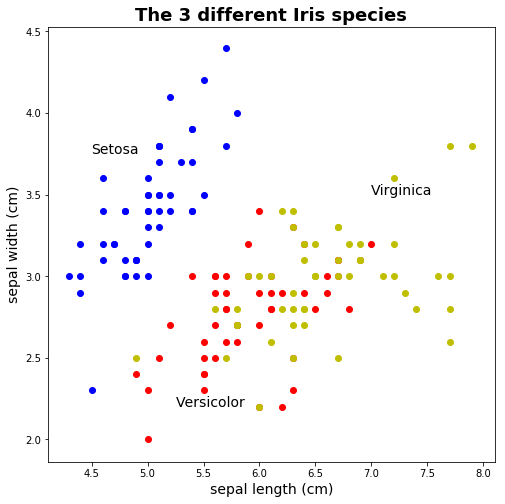

In [12]:
# Let's take a peak at the data:
plt.figure(figsize=(8,8))
colors = "bry"
for i, color in zip([0, 1, 2], colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)
    
plt.text(5.25, 2.20, "Versicolor", fontsize=14)
plt.text(7, 3.5, "Virginica", fontsize=14)
plt.text(4.5, 3.75, "Setosa", fontsize=14)

plt.title("The 3 different Iris species", fontsize=18, 
          fontweight='bold')    
plt.xlabel(iris_dataset.feature_names[0], fontsize=14)
plt.ylabel(iris_dataset.feature_names[1], fontsize=14)

plt.show()

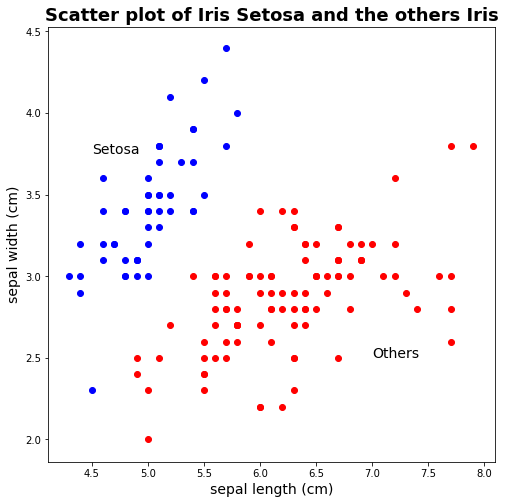

In [13]:
# We will focus identifying only the Iris Setosa
plt.figure(figsize=(8,8))
colors = "br"

idx = np.where(y == 0) # Give me the indices of the Iris Setosa examples

plt.scatter(X[idx, 0], X[idx, 1], c='b', cmap=plt.cm.Paired)
plt.text(4.5, 3.75, "Setosa", fontsize=14)

idx = np.where(y != 0) # where it's not Iris Setosa 
plt.scatter(X[idx, 0], X[idx, 1], c='r', cmap=plt.cm.Paired)
plt.text(7.0, 2.5, "Others", fontsize=14)


plt.title("Scatter plot of Iris Setosa and the others Iris",
          fontsize=18, fontweight='bold')  
plt.xlabel(iris_dataset.feature_names[0], fontsize=14)
plt.ylabel(iris_dataset.feature_names[1], fontsize=14)
plt.show()

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
### Second model  Logistic Regression


In [14]:
# We only care about whether each flower is a 
#     Iris Setosa and we are looking only at two of their features

X = iris_dataset.data
y = iris_dataset.target

new_y = y == 0

model = LogisticRegression(random_state=42, verbose=0)

model.fit(X[:,0:2], new_y)

accuracy = model.score(X[:,0:2], new_y)

print("Accuracy: {:0.3f}%".format(accuracy))


Accuracy: 0.993%


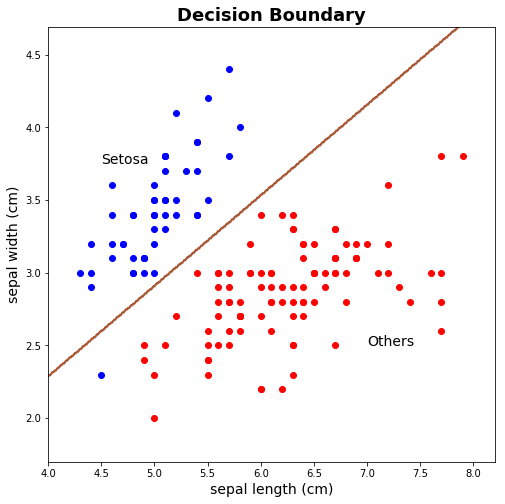

In [15]:
from Utils import predict_mesh

# Let's take a look at what our model is doing

# First plot the examples
plt.figure(figsize=(8,8))
colors = "br"

idx = np.where(y == 0)
plt.scatter(X[idx, 0], X[idx, 1], c='b', cmap=plt.cm.Paired)
plt.text(4.5, 3.75, "Setosa", fontsize=14)

idx = np.where(y != 0)
plt.scatter(X[idx, 0], X[idx, 1], c='r', cmap=plt.cm.Paired)
plt.text(7.0, 2.5, "Others", fontsize=14)

(xx, yy, Z) = predict_mesh(X, model)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)


plt.title("Decision Boundary", fontsize=18, fontweight='bold')   
plt.xlabel(iris_dataset.feature_names[0], fontsize=14)
plt.ylabel(iris_dataset.feature_names[1], fontsize=14)
plt.show()

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

## Linear Regression and Logistic Regression

### So how do these models work?

Let's start with linear regression:

$$ \hat{y} = w_0 + w_1.x_1 + w_2.x_2 + w_3.x_3$$ 

Adding a $x_0=1$ we get


$$ \hat{y} = w^T \cdot x $$

For each variable we have a weight, an "importance", and the linear combination of the weights and features results in our estimated value $\hat{y}$.

# Questions?




<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
#### How do we find the weights?

It's an optimization problem we want to find the weights that minimize the error over all the examples we have for training.

We can use any kind of optimization.



<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

### Logistic Regression

We want to use the same linear model  but now build a classifier.


For that we use the Logistic/Signmoid function .

taking:

$$ \hat{y} = w^T \cdot x $$


$$ \hat{y} = g(w^T \cdot x) $$

where: 

$$g(z) = \frac{1}{1 + e^{-z}}$$




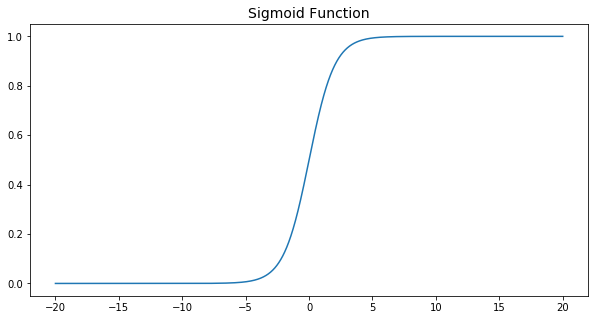

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-20, 20, 0.001)
y = sigmoid(x)

plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.title("Sigmoid Function", fontsize=14)
plt.show()

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

# Now to a real world example! 

Let's take the knowledge we gained and try to apply it to a real world dataset.




<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br> 
# Scotch!
![Scotch whiskies](https://c1.staticflickr.com/7/6184/6105844311_dc4c31b8b7_b.jpg)
[Source: Damien Pollet](https://flic.kr/p/aiy3MM)

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# First look at the data



In [17]:
# Read the data file and drop the collumns we don't care about:
whisky_dataframe = pd.read_csv(
    filepath_or_buffer="whiskies.csv", header=0, sep=',',
    index_col=1)
whisky_dataframe.drop(['RowID', 'Postcode', ' Latitude',
                       ' Longitude'], inplace=True, axis=1)
whisky_dataframe.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Distillery,,,,,,,,,,,,
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2
Aberlour,3,3,1,0,0,4,3,2,2,3,3,2
AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2
Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0
Ardmore,2,2,2,0,0,1,1,1,2,3,1,1


In [18]:
whisky_dataframe.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2.069767,2.290698,1.534884,0.546512,0.116279,1.244186,1.383721,0.976744,1.465116,1.802326,1.802326,1.697674
std,0.930410,0.717287,0.863613,0.990032,0.322439,0.853175,0.784686,0.932760,0.821730,0.629094,0.779438,0.855017
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000


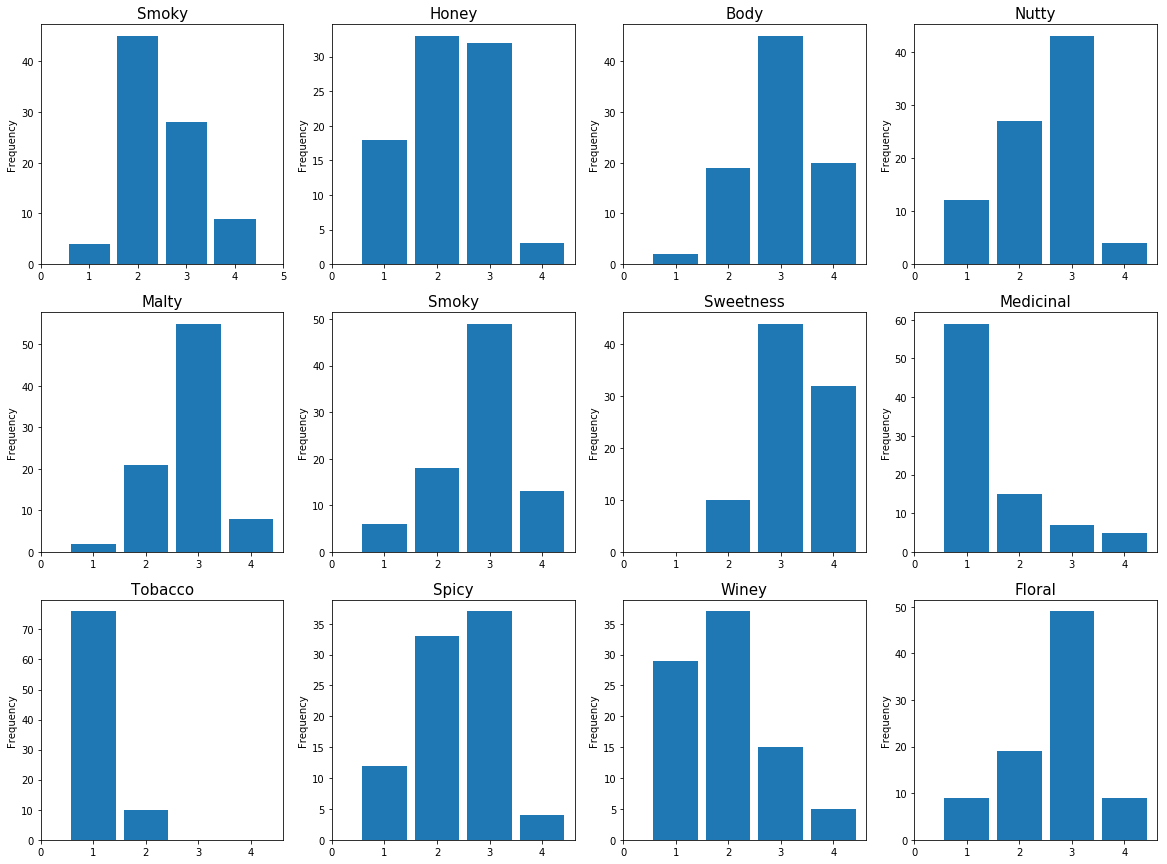

In [19]:
Utils.plot_whisky_histograms(whisky_dataframe)

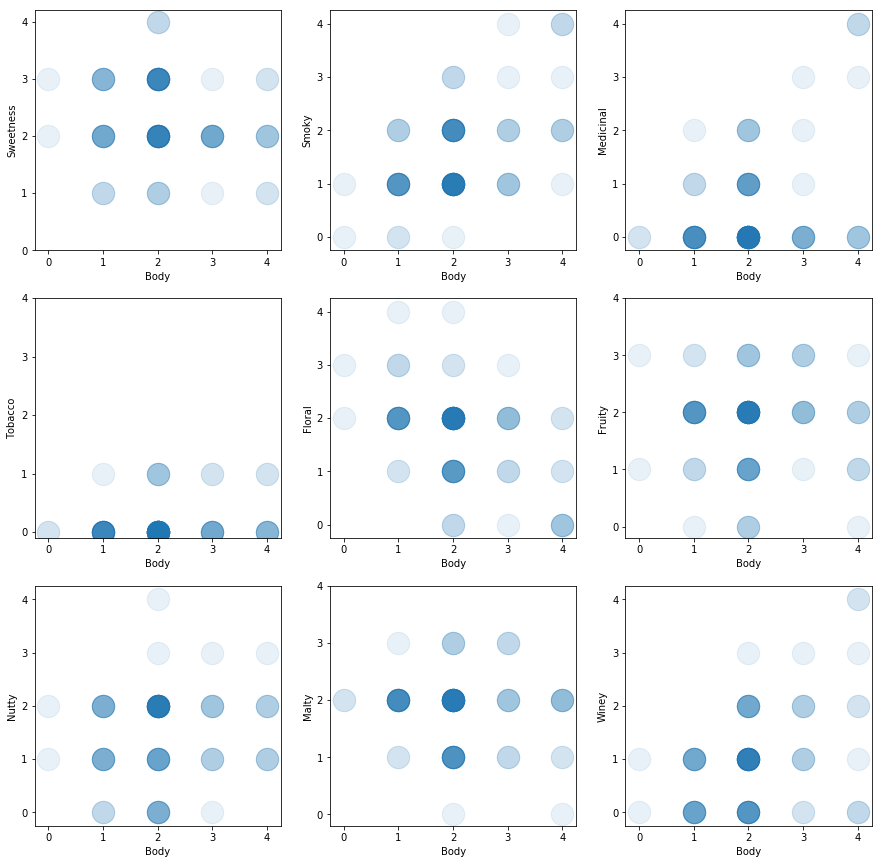

In [20]:
Utils.plot_whiky_body_correlation(whisky_dataframe)

In [21]:
whisky_data = whisky_dataframe.values
whisky_data

array([[2, 2, 2, ..., 2, 2, 2],
       [3, 3, 1, ..., 3, 3, 2],
       [1, 3, 2, ..., 2, 3, 2],
       ..., 
       [0, 3, 1, ..., 2, 1, 2],
       [2, 2, 1, ..., 1, 0, 0],
       [2, 3, 0, ..., 2, 2, 1]])

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

## Overfitting
### The more data you have the better? Not always:

__ The curse of dimentionality__
 
 
 _ When the dimensionality increases, the volume of the space increases so fast that the available data become sparse. _
 
 
__ Model Complexity__

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
#### Feature selection and extraction

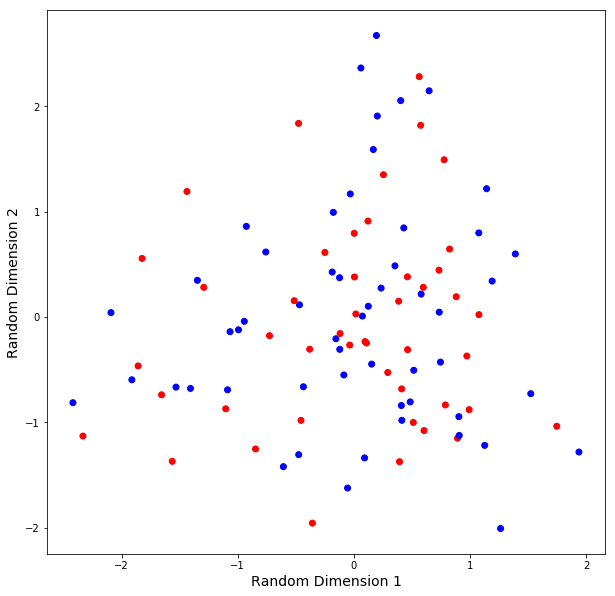

In [22]:
random_data = np.random.randn(100, 2)
random_labels = np.random.randint(0,2,100)

fig = plt.figure(figsize=(10,10))

plt.scatter(random_data[:, 0], random_data[:, 1],
            c=random_labels, cmap=cmap_bold)

plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)

plt.show()

In [23]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(random_data, random_labels)

print("Accuracy: {:0.3f}%".format(
        clf.score(random_data, random_labels)*100))


Accuracy: 100.000%


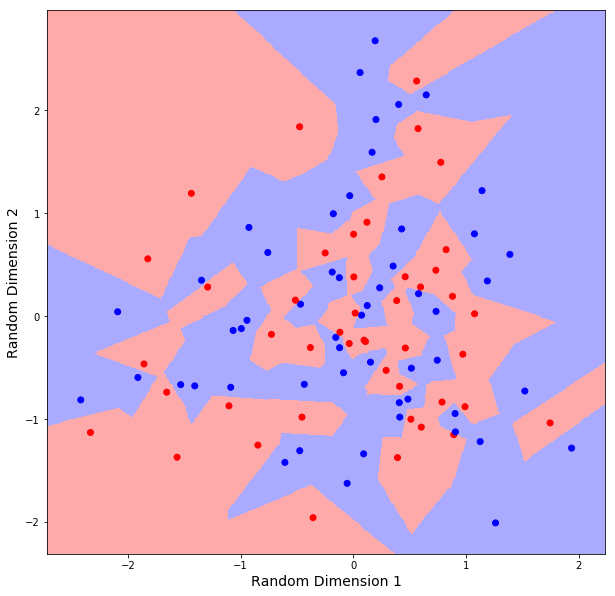

In [24]:
(xx, yy, Z) = predict_mesh(random_data, clf, h=0.01)

fig = plt.figure(figsize=(10,10))
plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(random_data[:, 0], random_data[:, 1],
            c=random_labels, cmap=cmap_bold)

plt.show()


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
## The curse of Dimensionality
<br></br>
<br></br>
<br></br>
__ More features != Better Results __

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

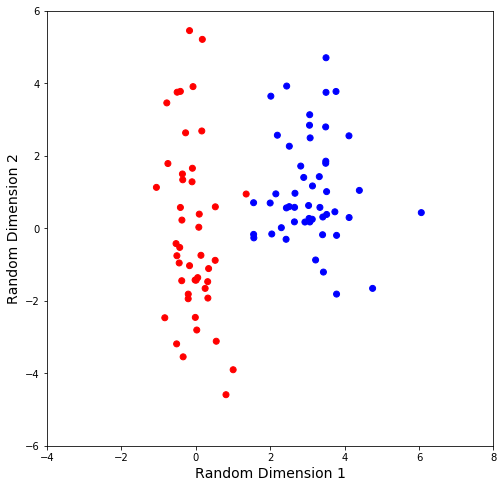

In [25]:
random_labels = np.concatenate([np.ones((50,)), np.zeros((50,))])

random_data = np.concatenate([
    np.add(np.multiply(np.random.randn(50, 2), 
                       np.array([0.7, 1.5])), np.array([3, 1])),
    np.multiply(np.random.randn(50, 2), 
                np.array([0.5, 3]))
    ]) 


fig = plt.figure(figsize=(8, 8))

plt.scatter(random_data[:, 0], random_data[:, 1], 
            c=random_labels, cmap=cmap_bold)
plt.xlim((-4, 8))
plt.ylim((-6, 6))
plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)

plt.show()

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

## PCA

Principal componentes are the directions of largest variance

The eigenvectors with the largest eigenvalues are the principal components

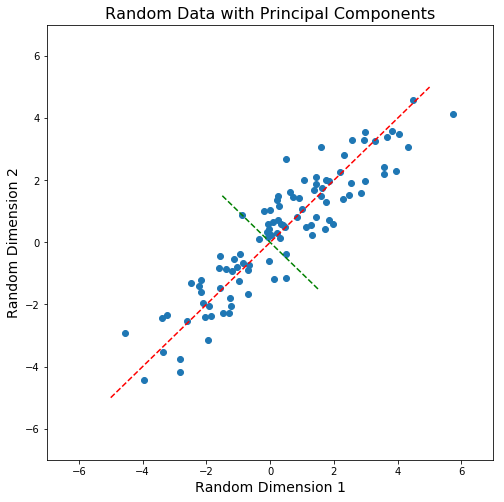

In [26]:
random_data =np.random.multivariate_normal(
    mean= [0, 0], cov=[[5, 5], [0, 0.5]], size=100)

fig = plt.figure(figsize=(8, 8))

plt.scatter(random_data[:, 0], random_data[:, 1])
plt.plot([-5, 5], [-5, 5], 'r--')
plt.plot([1.5, -1.5], [-1.5, 1.5], 'g--')

plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.title('Random Data with Principal Components', fontsize=16)

plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)

plt.show()

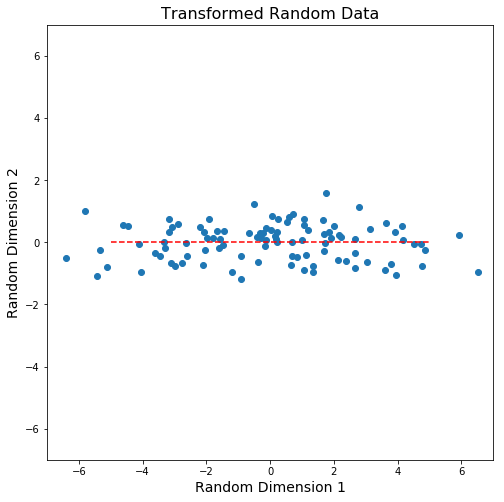

In [27]:
pca = PCA(n_components=2)
pca.fit(random_data)
transformed_data = pca.fit_transform(random_data)

plt.figure(figsize=(8,8))
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.plot([-5, 5], [0, 0], 'r--')
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.title('Transformed Random Data', fontsize=16)
plt.xlabel('Random Dimension 1', fontsize=14)
plt.ylabel('Random Dimension 2', fontsize=14)

plt.show()

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

# Back to Scotch!

Let's apply what we learned to our dataset

In [28]:
pca = PCA(n_components=2, whiten=True) 
# Here whiten means centering the data around 0, 
# which is needed so that PCA works correctly
transformed_data = pca.fit_transform(whisky_data)

In [29]:
print("% of variance explained by each component: 1st {:0.1f}% 2nd {:0.1f}%".format(
        pca.explained_variance_ratio_[0]*100, pca.explained_variance_ratio_[1]*100))


% of variance explained by each component: 1st 30.1% 2nd 19.2%


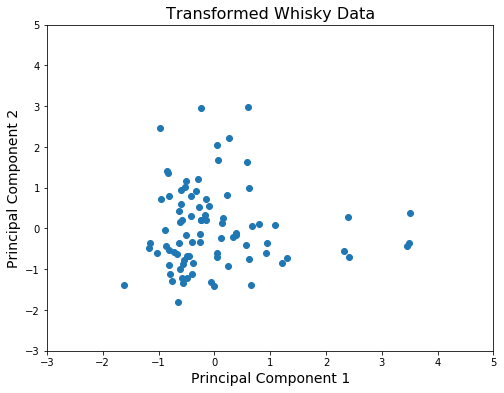

In [30]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x = transformed_data[:,0], y=transformed_data[:,1])

plt.xlim((-3, 5))
plt.ylim((-3, 5))

plt.title('Transformed Whisky Data', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

plt.show()

TODO: Try PCA with 3 components? and plot them


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

### Predicting whether it has Tobacco taste

In [31]:
labels = whisky_dataframe['Tobacco']
whisky_data = whisky_dataframe.drop('Tobacco', axis=1).values

In [32]:
print("Percentage of Positive Labels: {:.2f}%".format(
        np.sum(labels)/len(labels)*100))

Percentage of Positive Labels: 11.63%


In [33]:
class_weight={0:1, 1: 10}

In [34]:
pca = PCA(n_components=2, whiten=True) 
# Here whiten means centering the data around 0, 
# which is needed so that PCA works correctly
transformed_data = pca.fit_transform(whisky_data)

In [35]:
classf = LogisticRegression(random_state=42, 
                            class_weight=class_weight)

In [36]:
# Select parameters to use in Cross-Validation
classf_cv = classf
data_cv = transformed_data
N_CV = 10

# Cross Validation
t0 = time()
scores = cross_val_score(classf_cv, data_cv, labels, cv = N_CV)
print("Scores: ")
for i, score in enumerate(scores):
    print( '\t' + str(i) + ':\t' + str(score)) 
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
print("\nCross val done in %0.3fs." % (time() - t0))

Scores: 
	0:	0.666666666667
	1:	0.777777777778
	2:	0.555555555556
	3:	0.666666666667
	4:	0.888888888889
	5:	0.777777777778
	6:	0.5
	7:	0.875
	8:	0.625
	9:	0.625
Accuracy: 0.696 (+/- 0.247)

Cross val done in 0.035s.


In [37]:
train_data, test_data, train_labels, test_labels = train_test_split(
    transformed_data, labels, test_size=0.20)

classf = LogisticRegression(class_weight=class_weight)

classf.fit(train_data, train_labels)

predicted_labels = classf.predict(test_data)
confusion_matrix(test_labels, predicted_labels)

array([[13,  4],
       [ 1,  0]])

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
## Resources:

#### Online Courses:
- [Machine Learning by Andrew Ng](https://www.coursera.org/learn/machine-learning)

#### Books:
- [Master Algorithm](https://www.amazon.com/Master-Algorithm-Ultimate-Learning-Machine/dp/0465065708)
- [Pattern Recognition and Machine Learning](https://www.amazon.co.uk/Pattern-Recognition-Learning-Information-Statistics-x/dp/0387310738)

#### Articles:
- [A few useful things to know about Machine Learning](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)


#### Tutorials:
- [Kaggle: Predicting Survival rate on the Titanic](https://www.kaggle.com/c/titanic)
- [Scikit-Learn Tutorials](http://scikit-learn.org/stable/tutorial/index.html)


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br><br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>

## Unsupervised Learning
 
 ### Clustering: K -means
 
 TODO: Explain with toy data set, add video / GIF?

#### Clustering Scotch:

### Now let's make some predictions: (Tobacco ?)

### How evaluate our models? 
#### Cross Validation


### There is so much more

This can not even be considered scraping the surface. Go ahead and experiment it's a very interesting field, and there are tons of information and places to learn from!

In [38]:
whisky_data = pd.read_csv(
    filepath_or_buffer="Meta-Critic Whisky Database – Selfbuilts Whisky Analysis.csv")
whisky_data.describe()
whisky_data.head()


,Whisky,Meta Critic,STDEV,#,Cost,Class,Super Cluster,Cluster,Country,Type
0,Glenfarclas 40yo,9.25,0.30,11,$$$$$+,SingleMalt-like,ABC,A,Scotland,Malt
1,Amrut Greedy Angels (8yo and 10yo),9.20,0.20,6,$$$$$+,SingleMalt-like,ABC,C,India,Malt
2,Redbreast 21yo,9.19,0.31,13,$$$$$,SingleMalt-like,ABC,C,Ireland,Malt
3,Amrut Spectrum,9.18,0.24,8,$$$$$,SingleMalt-like,ABC,C,India,Malt
4,Highland Park 25yo,9.17,0.23,13,$$$$$+,SingleMalt-like,ABC,C,Scotland,Malt
